In [12]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# LAB 7 - Applying SHELLE-NPZD2 to an embayment with an Open Boundary and Climatology forcing (eutrophication and oxygen depletion)

MARI4600/BIO5600: Ecosystem Modelling for Aquaculture (Dalhousie University)

----------------------------------------

**Rendered link:** http://nbviewer.jupyter.org/urls/github.com/Diego-Ibarra/aquaculture-modelling/blob/master/Week7/LAB%207%20-%20Applying%20SHELLE-NPZD2%20to%20an%20embayment%20with%20an%20Open%20Boundary%20and%20Climatology%20forcing.ipynb

--------------------------------------



### Setup of workspace

<span class="important"></span> Make sure all required files are in the working directory:

* Create a **folder** on the "Desktop" and name it <span class='file'>Lab7</span>
* From Brightspace, download the following files into your new folder <span class='file'>Desktop\Lab7</span>:
   * <span class='file'>model_NPZD2_SHELLE_embayment_O2.py</span>
   * <span class='file'>forcing.py</span>
   * <span class='file'>plot_experiment.py</span>
   * <span class='file'>Nitrate.csv</span>
   * <span class='file'>PhyZooSDetLDet.csv</span>
   * <span class='file'>TempSaltOxy.csv</span>
   
* In Spyder, change the "working directory" to: <span class='file'>Desktop\Lab7</span>. Note that to change the "working directory", click on "folder icon" on top-right corner.

----------------------------------


# Forcing

First, lets lets take a look to the "forcing". The <span class="file">forcing.py</span> module loads data from supplied <span class="file">.csv</span> files, makes the forcing of appropriate length, and prints it. Some variables are imported from NOAA climatologies (`Temp`, `Salt`, `NO3`, `Oxy`), some were approximated using data for Nova Scotia (`Phy`, `Zoo`, `NH4`, `SDet`, `LDet`) and some where done analytically (`I`).

<div class="c2c"></div>

Oxygen Units were changed!
Oxygen Units were changed!


C:\Users\Diego\Anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\Diego\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


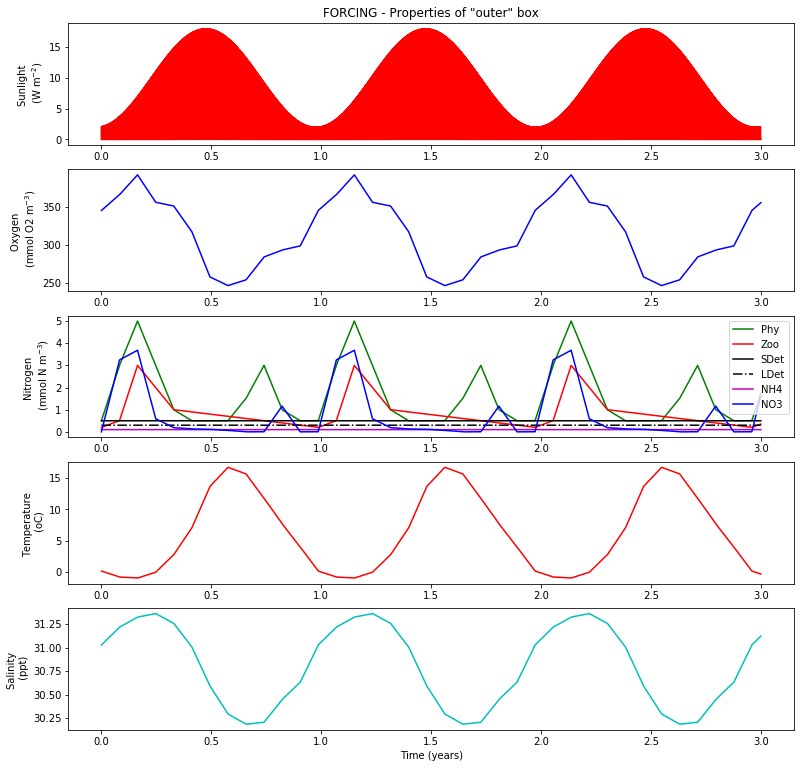

In [5]:
import model_NPZD2_SHELLE_embayment_O2 as model
import forcing

# Load model defaults
days, dt, par, InitCond = model.load_defaults()

# load forcing data and interpolate to match the size of the modelled arrays (i.e. length = days/dt).
forc = forcing.get(dt,days)

# Plot forcing
forcing.plot(dt,days,forc)

When we executed `forc = forcing.get(dt,days)`, we created a `forc` dictionary containing all the forcing that we'll need in today's lab. You may need to do something similar for your "final project", so it is worth spending a bit extra time exploring `forc` and how to it was created.

First, use the `.keys()` method to explore what is in the `forc` dictionary:

In [6]:
forc.keys()

dict_keys(['Temp', 'Salt', 'Oxy', 'NO3', 'Phy', 'Zoo', 'SDet', 'LDet', 'NH4', 'I'])

As you can see, there are many water-column biogeochemical and physical variables, and also light (`I`). You can access any of these arrays using these keys. Example:

In [7]:
forc['Temp']

array([ 0.1369    ,  0.13658053,  0.13626106, ..., -0.34166106,
       -0.34198053, -0.3423    ])

Use the `len` function to see what is the length of `forc['Temp']`

<div class="Q"><br>

What is the length of <b>forc['Temp']</b> ?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

What is the "theoretical" length of <b>forc['Temp']</b> ?

<br><br><div class="qhelp"></div></div>

Just for curiosity, lets make sure that `days/dt` is the same as the length of `forc['Temp']`

In [8]:
days/dt

109500.0

<div class="Q"><br>

Open in Excel the file <b>TempSaltOxy.csv</b>
<br><br>
What is the length of the <b>Temperature</b> array?
<br><br>
...or in other words, how many rows of data are in the <b>temperature_an</b> column?

<br><br><div class="qhelp"></div></div>

-----------

## How were the forcing arrays created?

Several functions in `forcing.py` were used to create the `forc` dictionary, by reading data from several `.csv` files, and by interpolating these data to match the length of the modeled arrays (i.e. length = days/dt).

### Temp, Salt and Oxy

Climatologies of Temperature, Salinity and Dissolved Oxygen came from NOAA's ERDDAP, and were saved in the <span class="file">TempSaltOxy.csv</span> file. You can write code to download this data using Python, but since you are likely to need to do this only once, you can simply use the ERDDAP web interface to do this.

Here are the steps I used to create <span class="file">TempSaltOxy.csv</span> file:

<div class="note"></div> if you need to get climatologies for a different location in the world or a different depth, substitute the values below for your values.

* Go to: https://coastwatch.pfeg.noaa.gov/erddap/griddap/nodcWoa09mon1t_LonPM180.html
* Enter the following values:
    * time Start: 0000-01-16T00:00:00Z
    * time Stride: 1
    * time Stop: 0000-12-16T00:00:00Z
    * depth Start: 0.0
    * depth Stride: 1
    * depth Stop: 0.0
    * latitude Start: 44.5
    * latitude Stride: 1
    * latitude Stop: 44.5
    * longitude Start: -61.5
    * longitude Stride: 1
    * longitude Stop: -61.5
* Clear all `Grid Variables` boxes except for:
    * temperature_an (Objectively Analyzed Temperature Climatology, degree_C) 
    * salinity_an (Objectively Analyzed Practical Salinity Climatology, PSS-78)
    * disOxygen_an (Objectively Analyzed Dissolved Oxygen Climatology, ml/l)
* Select `File type:` as: `.csv`
* Click `Submit`
* Rename the downloaded file to <span class="file">TempSaltOxy.csv</span>
* Make sure to move the new file to your working directory

Below is a "screen grab" of the ERDDAP page showing the values used for this tutorial:

<img src="./Slide4.PNG" width="1000px">

<br>
<br>


<span class="important"></span> Note that <span class="file">forcing.py</span> changes the units of Oxygen concentration from the units coming from ERDDAP (ml/l) to units of mmol O$_2$ m$^{-3}$ 

### NO3

Climatology of Nitrate also came from NOAA's ERDDAP, and is saved in the <span class='file'>Nitrate.csv</span> file. Same as with "Temp, Salt and Oxy", you can simply enter your requested values in the ERDDAP web interface.

* Go to: https://coastwatch.pfeg.noaa.gov/erddap/griddap/nodcWoa09mon1n_LonPM180
* time, depth, latitude and longitude are same as above
* Clear all `Grid Variables` boxes except for:
    * nitrate_an (Objectively Analyzed Nitrate Climatology, micromoles/l)
    * phosphate_an (Objectively Analyzed Phosphate Climatology, micromoles/l)
    * silicate_an (Objectively Analyzed Silicate Climatology, micromoles/l)
* Select `File type:` as: `.csv`
* Click `Submit`
* Rename the downloaded file to <span class="file">Nitrate.csv</span>
* Make sure to move the new file to your working directory

<span class="note"></span> I added a few extra variables (phosphate and silicate) that we don't need now, but might in the future.

### Phy, Zoo, NH4, SDet and LDet

Climatologies for Phytoplankton, Zooplankton, Ammonia, Small Detritus and Large Detritus were "made-up" so that they roughly resemble plankton/nutrient dynamics in Nova Scotia. Essentially, `Phy` shows a "spring bloom" and a "fall bloom", `Zoo` only exhibits a "peak" during the phytoplankton spring bloom, and `NH4`, `SDet` and `LDet` are made constant throughout the year. Open the <span class='file'>PhyZooSDetLDet.csv</span> file and take a look.

### Light (`I`)

Light was calculated analytically, in <span class='file'>forcing.py</span>, the same way we did in previous plankton models. The section of code in <span class='file'>forcing.py</span> where `I` is created is shown below:


In [9]:
import numpy as np

NoSTEPS = int(days / dt) # Calculates the number of steps by dividing days by dt and rounding down
time = np.linspace(0,days,NoSTEPS) # Makes and vector array of equally spaced numbers from zero to "days"
I  = np.zeros((NoSTEPS,),float) # same as above

# Creating sunlight
for i in range(len(I)):
    I[i] = 10 * np.sin((2*np.pi*time[i])/1) + \
           8 * np.sin(((2*np.pi*time[i])/365)-2100)
    # We can't have negative light... so negatives are made zero 
    if I[i] < 0:
        I[i] = 0.0000001

------------------------

# Expanding last week's model "model_NPZD2_SHELLE_embayment_O2" to accept forcing and to have an Open Bounday condition

In spyder, open <span class='file'>model_NPZD2_SHELLE_embayment_O2.py</span> and save it with the following name: <span class='file'>model_NPZD2_SHELLE_openBoundary_withForcing.py</span>

We will be adding pieces of code to this new file. You can see the final <span class='file'>model_NPZD2_SHELLE_openBoundary_withForcing.py</span> in <span class="checkpoint"><a href="https://raw.githubusercontent.com/Diego-Ibarra/aquaculture-modelling/master/Week7/model_NPZD2_SHELLE_openBoundary_withForcing.py" target="__blank">HERE</a></span> 

Lets begin adding code...

-------------------------

### Adding new parameter (Exchange with Open Ocean)

First we'll add a new parameter, `par['chi']`, which defines the exchange between the open ocean and your modeled embayment (or tank). For example, `par['chi'] = 0` means that no water is exchanged with the open ocean, `par['chi'] = 0.5` means that half of the water in the embayment (or tank) is replaced every day.

In <span class='file'>model_NPZD2_SHELLE_openBoundary_withForcing.py</span>, do the following modifications:

Add `par['chi'] = 0.01` to the `# Parameters` section...

Original:

```
    # Physical characteristics of embayment
    par['X'] = 1. # Basin length
    par['Y'] = 1. # Basin width
    par['Z'] = 1. # Basin depth
    par['V'] = par['X'] * par['Y'] * par['Z']
```

New:

```
    # Physical characteristics of embayment
    par['chi'] = 0.01  # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< New Line
    par['X'] = 1. # Basin length
    par['Y'] = 1. # Basin width
    par['Z'] = 1. # Basin depth
    par['V'] = par['X'] * par['Y'] * par['Z']
```

-------------------------

### Getting ready to accept forcing

We need to modify the `run` function so that it accepts forcing as an argument.

In <span class='file'>model_NPZD2_SHELLE_openBoundary_withForcing.py</span>, do the following modifications:

Replace the following in the `run` function...

Original:

```
def run(days,dt,InitCond,par):
```

New:

```
def run(days,dt,InitCond,par,forc):
```

-------------------------

### Setting up forcing

In <span class='file'>model_NPZD2_SHELLE_openBoundary_withForcing.py</span>, do the following modifications:

Add the following **before** the `# MAIN MODEL LOOP` section...

Original:

```   
    # *****************************************************************************
    # MAIN MODEL LOOP *************************************************************
    for t in range(0,NoSTEPS-1):
```

New:

```
    # Forcing
    Salt = forc['Salt']
    Temp = forc['Temp']
    I = forc['I']
    Phy0 = forc['Phy']
    Zoo0 = forc['Zoo']
    SDet0 = forc['SDet']
    LDet0 = forc['LDet']
    NH40 = forc['NH4']
    NO30 = forc['NO3']
    Oxy0 = forc['Oxy']
    
    # *****************************************************************************
    # MAIN MODEL LOOP *************************************************************
    for t in range(0,NoSTEPS-1):
```

Note that `Phy0`, `Zoo0`, `Oxy0`, etc. are the tracer concentrations in the "open ocean". 

-------------------------

### Setting up forcing (con't)

In <span class='file'>model_NPZD2_SHELLE_openBoundary_withForcing.py</span>, do the following modifications:

Add the following **before** the `# Update and step` section...

Original:

```   
        # Update and step ----------------------------------------------------
```

New:

```
        # Physical Model ======================================================
        dPhydt = dPhydt + (par['chi'] * (Phy0[t] - Phy[t]))
        dZoodt = dZoodt + (par['chi'] * (Zoo0[t] - Zoo[t]))
        dNH4dt = dNH4dt + (par['chi'] * (NH40[t] - NH4[t]))
        dNO3dt = dNO3dt + (par['chi'] * (NO30[t] - NO3[t]))
        dSDetdt = dSDetdt + (par['chi'] * (SDet0[t] - SDet[t]))
        dLDetdt = dLDetdt + (par['chi'] * (LDet0[t] - LDet[t]))
        dOxydt = dOxydt + (par['chi'] * (Oxy0[t] - Oxy[t]))
        
        # Update and step ----------------------------------------------------
```

--------

# Experiments


Now that we finished <span class='file'>model_NPZD2_SHELLE_openBoundary_withForcing.py</span>, we will use this model to run several experiments. In the first three experiments, we'll adjust the physical dimensions of the model as a 1 X 1 X 1 m tank (see diagram below). 

<img src="./Slide1.png" width="800px">

With this set up, you can think the model as a tank that receives water from the open ocean via a pump. How fast the pump deliver water into the tank is controlled by the parameter `par['chi']`. 

-------------------

# Experiment 1: Tank with no exchange and no mussels

In the first experiment we'll make `par['chi'] = 0` to simulate zero water from the open ocean entering the tank. We'll also make `InitCond['n_muss'] = 0.` to specify that there are zero mussels in this run.

Note that, instead of calling the output `output`, we will call it `Exp1_tank_noMussels`, so that we can easily differentiate this output from the output of subsequent model runs.

<div class="c2c"></div>

Oxygen Units were changed!
Oxygen Units were changed!
Model run: DONE!!!


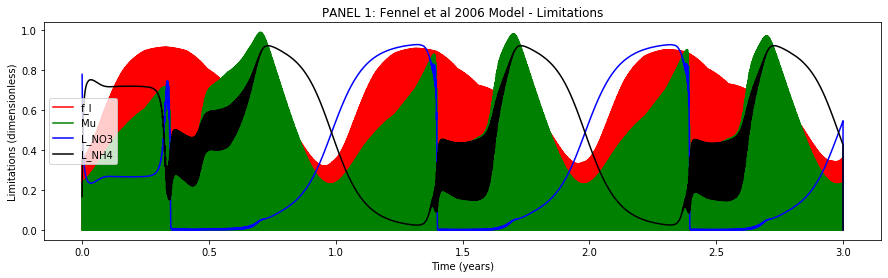

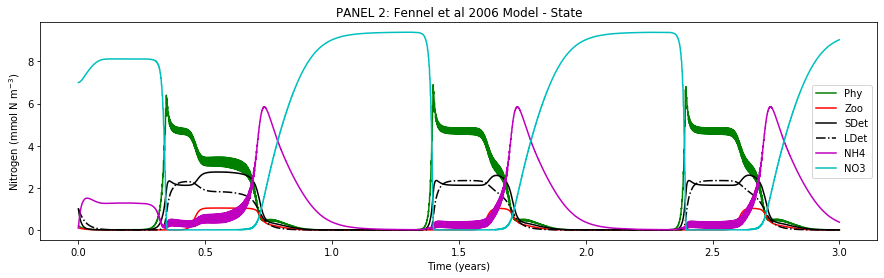

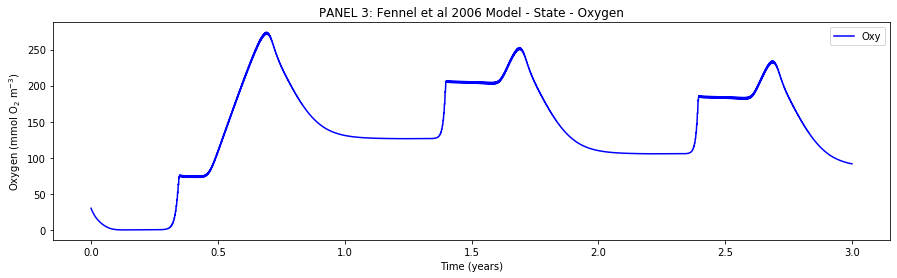

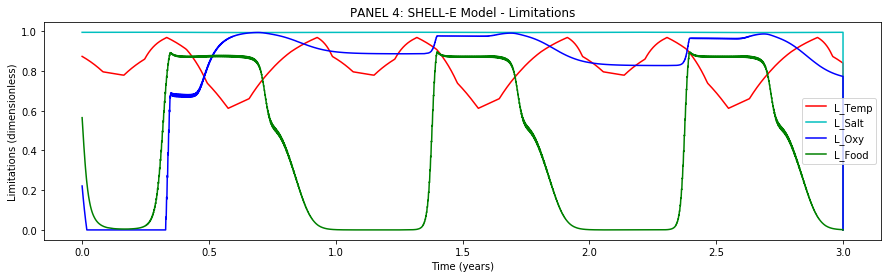

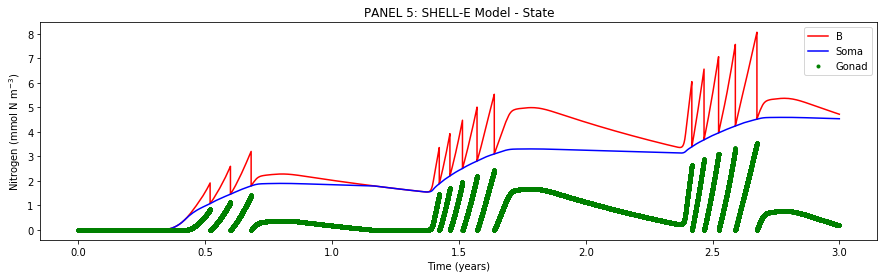

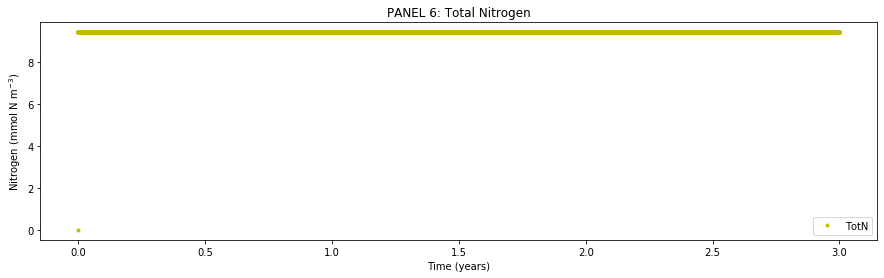

In [13]:
import model_NPZD2_SHELLE_openBoundary_withForcing as model
from importlib import reload
reload(model)
import forcing

days, dt, par, InitCond = model.load_defaults() #Load defaults
forc = forcing.get(dt,days) # Load forcing

#------ Change the defaults ---------------
# No exchange of water in tank
par['chi']  = 0.0 # This is the coefficient dictating the exchange with the "open ocean" 
par['X'] = 1. # Basin length
par['Y'] = 1. # Basin width
par['Z'] = 1. # Basin depth
# and take out all mussels
InitCond['n_muss'] = 0.
# ----------------------------------------

# Run model ------------------------------
Exp1_tank_noMussels = model.run(days,dt,InitCond,par,forc) # Run model
model.plot(Exp1_tank_noMussels) # Plot model

<div class="Q"><br>

Is the total nitrogen in system (i.e. TotN) conserved during the Experiment 1?

<br><br><div class="qhelp"></div></div>

Note that although the model has ZERO mussels, the model still calculates how fast one mussel would grow, if there was a mussel in the model (same with mussel limitations).

<div class="Q"><br>

If you were to put a mussel in the tank of Experiment 1, how many times would it spawn in the 3 years of the experiment?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

If you were to put a mussel in the tank of Experiment 1, what would be most limiting factor (i.e. the variable limiting mussel growth the most)?

<br><br><div class="qhelp"></div></div>

----------------

# Experiment 2: Tank with no exchange, WITH 10 mussels

In Experiment 2, we'll repeat experiment 1 with the one modification of adding 10 mussels, by making `InitCond['n_muss'] = 10.`

Again, note that instead of calling the output `output`, we will call it `Exp2_tank_WITHMussels`, so that we can easily differentiate this output from the output of previous and subsequent model runs.


<div class="c2c"></div>

Oxygen Units were changed!
Oxygen Units were changed!
Model run: DONE!!!


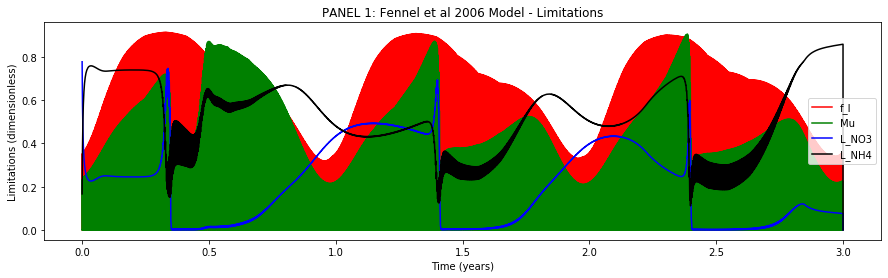

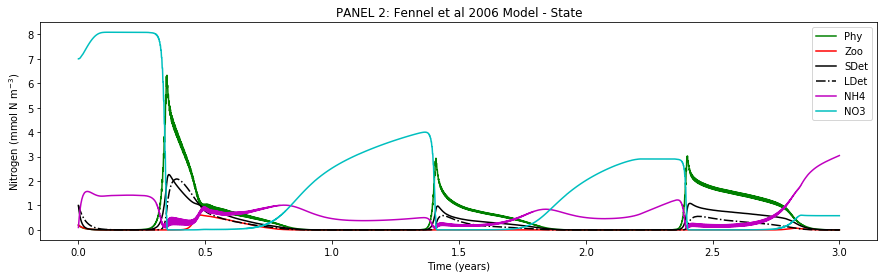

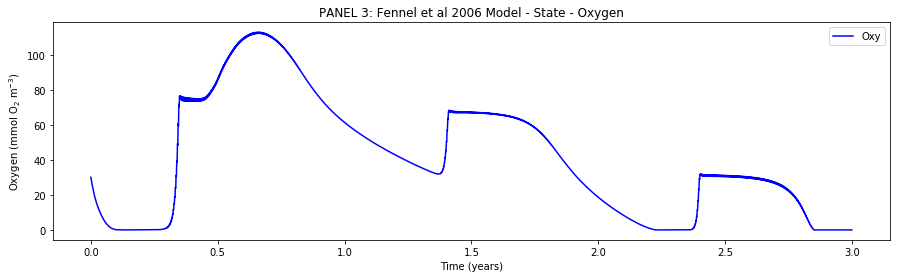

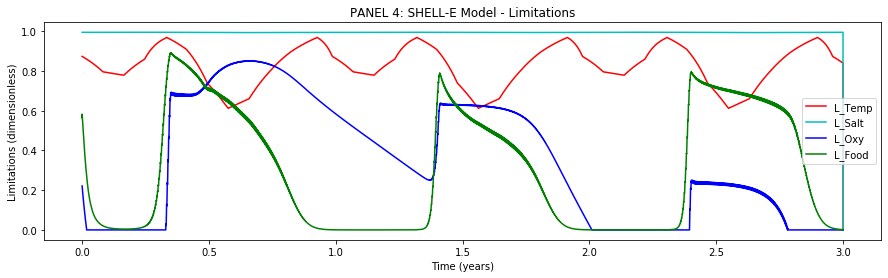

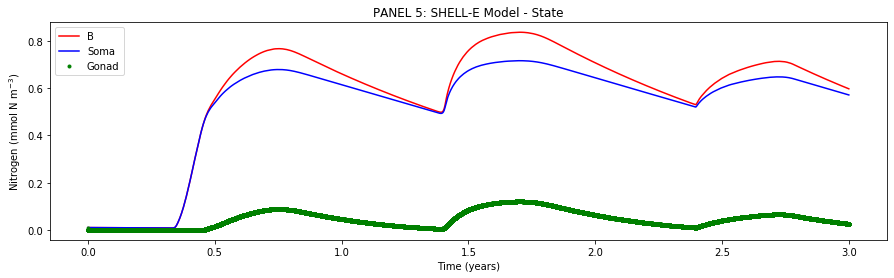

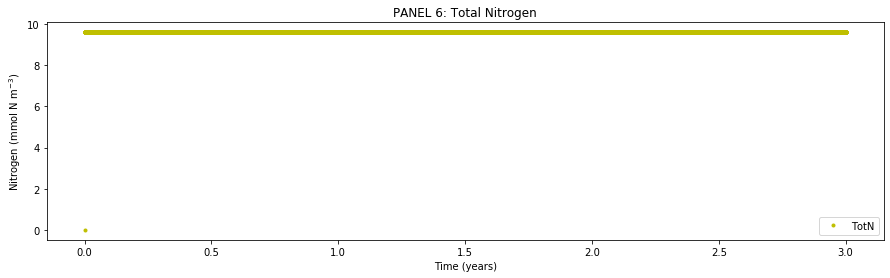

In [14]:
import model_NPZD2_SHELLE_openBoundary_withForcing as model
from importlib import reload
reload(model)
import forcing

days, dt, par, InitCond = model.load_defaults() #Load efaults
forc = forcing.get(dt,days) # Load forcing

#------ Change the default ---------------
par['chi']  = 0.0 # No water exchenge in tank
par['X'] = 1. # Basin length
par['Y'] = 1. # Basin width
par['Z'] = 1. # Basin depth
InitCond['n_muss'] = 10. # Add 10 mussels
# ----------------------------------------

# Run model ------------------------------
Exp2_tank_WITHMussels = model.run(days,dt,InitCond,par,forc) # Run model
model.plot(Exp2_tank_WITHMussels) # Plot model

<div class="Q"><br>

Is the total nitrogen in system (i.e. TotN) conserved during the Experiment 2?

<br><br><div class="qhelp"></div></div>

Note that although the model has ZERO mussels, the model still calculates how fast one mussel would grow, if there was a mussel in the model (same with mussel limitations).

<div class="Q"><br>

In Experiment 2, how many times did our mussels spawned in the 3 years of the experiment?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

In Experiment 2, what would be most limiting factor for mussels (i.e. the variable limiting mussel growth the most)?

<br><br><div class="qhelp"></div></div>

To clearly show the differences between `Exp1_tank_noMussels` and `Exp2_tank_WITHMussels1`, we should show the results of both models in one single plot.


<div class="c2c"></div>

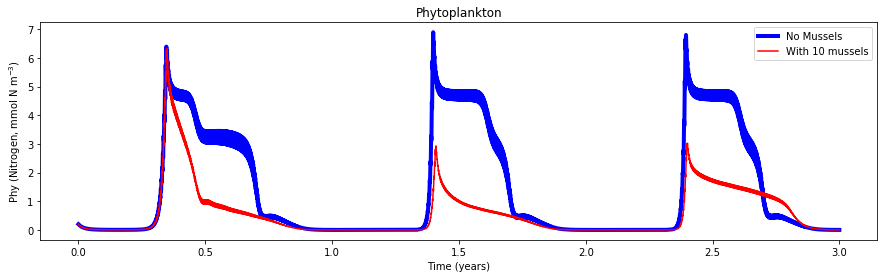

In [15]:
import matplotlib.pyplot as plt
fig, (ax) = plt.subplots(1,1,figsize=(15, 4))
ax.plot(Exp1_tank_noMussels['time']/365,Exp1_tank_noMussels['Phy'],'b-',linewidth='4')
ax.plot(Exp2_tank_WITHMussels['time']/365,Exp2_tank_WITHMussels['Phy'],'r-')
ax.set_xlabel('Time (years)')
ax.set_ylabel('Phy (Nitrogen, mmol N m$^{-3}$)')
ax.set_title('Phytoplankton')
ax.legend(['No Mussels','With 10 mussels'])

<div class="Q"><br>

What happened with "Phy" in Experiment 2, compared to "Phy" in Experiment 1?

<br><br><div class="qhelp"></div></div>

Lets take a look to oxygen...

<div class="c2c"></div>

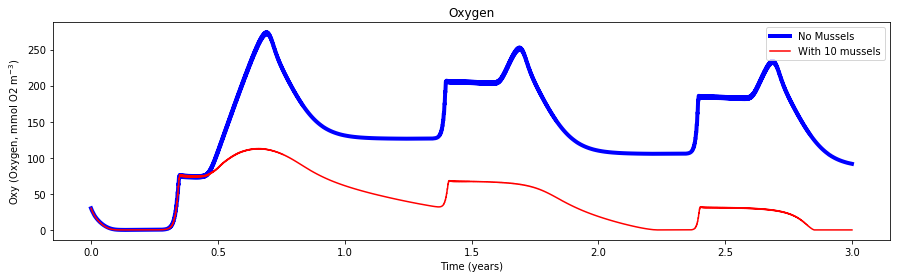

In [16]:
import matplotlib.pyplot as plt
fig, (ax) = plt.subplots(1,1,figsize=(15, 4))
ax.plot(Exp1_tank_noMussels['time']/365,Exp1_tank_noMussels['Oxy'],'b-',linewidth='4')
ax.plot(Exp2_tank_WITHMussels['time']/365,Exp2_tank_WITHMussels['Oxy'],'r-')
ax.set_xlabel('Time (years)')
ax.set_ylabel('Oxy (Oxygen, mmol O2 m$^{-3}$)')
ax.set_title('Oxygen')
ax.legend(['No Mussels','With 10 mussels'])

<div class="Q"><br>

What happened with "Oxy" in Experiment 2, compared to "Oxy" in Experiment 1?

<br><br><div class="qhelp"></div></div>

--------------------

# Experiment 3: Tank with partial exchange and varying mussels

In this experiment we'll do several model runs, all with 10 mussels, however with increasing degrees of water exchange (i.e. `par['chi']  = 0.01`, `par['chi']  = 0.2` and `par['chi']  = 1.5`).

Again, note that instead of calling the outputs `output`, we will call them `Exp3a_tank_WITHMussels_lowExchange`, `Exp3b_tank_WITHMussels_mediumExchange` and `Exp3c_tank_WITHMussels_highExchange` so that we can easily differentiate this output from the output of previous and subsequent model runs.


<div class="c2c"></div>

In [17]:
import model_NPZD2_SHELLE_openBoundary_withForcing as model
from importlib import reload
reload(model)
import forcing

days, dt, par, InitCond = model.load_defaults() #Load defaults
forc = forcing.get(dt,days) # Load forcing

#------ Change the defaults AND RUN MODEL ---------------
par['chi']  = 0.01 # Low exchange coefficient
InitCond['n_muss'] = 10.
Exp3a_tank_WITHMussels_lowExchange = model.run(days,dt,InitCond,par,forc) # Run model

#------ Change the defaults AND RUN MODEL ---------------
par['chi']  = 0.2 # Medium exchange coefficient 
InitCond['n_muss'] = 10.
Exp3b_tank_WITHMussels_mediumExchange = model.run(days,dt,InitCond,par,forc) # Run model

#------ Change the defaults AND RUN MODEL ---------------
par['chi']  = 1.5 # High exchange coefficient 
InitCond['n_muss'] = 10.
Exp3c_tank_WITHMussels_highExchange = model.run(days,dt,InitCond,par,forc) # Run model

Oxygen Units were changed!
Oxygen Units were changed!
Model run: DONE!!!
Model run: DONE!!!
Model run: DONE!!!


Now lets show all the result in one plot. Note that, in addition to `Exp3a_tank_WITHMussels_lowExchange`, `Exp3b_tank_WITHMussels_mediumExchange` and `Exp3c_tank_WITHMussels_highExchange`, we'll also add the results from `Exp2_tank_WITHMussels` as a run with 10 mussels but zero exchange, and we'll also ad the phytoplankton concentration of the open ocean, `forc['Phy']`, as a reference.

<div class="c2c"></div>

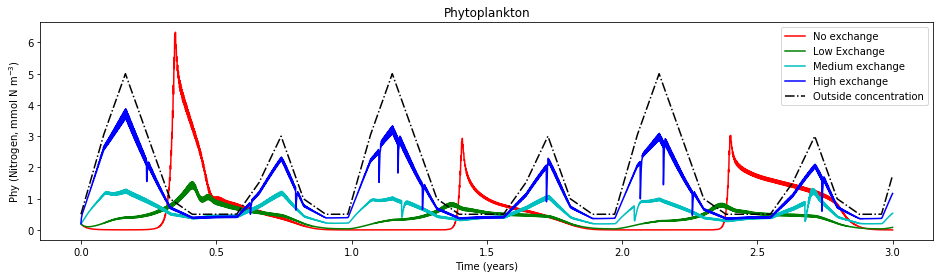

In [18]:
import matplotlib.pyplot as plt
fig, (ax) = plt.subplots(1,1,figsize=(16, 4))
ax.plot(Exp2_tank_WITHMussels['time']/365,Exp2_tank_WITHMussels['Phy'],'r-')
ax.plot(Exp3a_tank_WITHMussels_lowExchange['time']/365,Exp3a_tank_WITHMussels_lowExchange['Phy'],'g-')
ax.plot(Exp3b_tank_WITHMussels_mediumExchange['time']/365,Exp3b_tank_WITHMussels_mediumExchange['Phy'],'c-')
ax.plot(Exp3c_tank_WITHMussels_highExchange['time']/365,Exp3c_tank_WITHMussels_highExchange['Phy'],'b-')
ax.plot(Exp2_tank_WITHMussels['time']/365,forc['Phy'],'k-.')
ax.set_xlabel('Time (years)')
ax.set_ylabel('Phy (Nitrogen, mmol N m$^{-3}$)')
ax.set_title('Phytoplankton')
ax.legend(['No exchange', 'Low Exchange', 'Medium exchange', 'High exchange', 'Outside concentration'])

Note that `Phy` from the run with High exchange (dark blue line) resembles closely `Phy` in the Open Ocean (dotted black line). Also, `Phy` in the run with No exchange (red line) is completely different from the Open Ocean, where the "spring bloom" is delayed and there is no visible "fall bloom". `Phy` from the run with low exchange (green line) resembles a bit the case with No exchange (red), while `Phy` from the run with medium exchange (light cyan line) resembles a bit the case with High exchange (dark blue line). If `par['chi'] = 0` then all the planktonic dynamics will emerge from the interaction of tank water with the environment and initial conditions. On the other hand if `par['chi']` is large, the planktonic dynamics will resemble the open boundary.

Now lets take a look at the total Nitrogen `TotN`. Do you this it is conserved throughout the simulations?

<div class="c2c"></div>

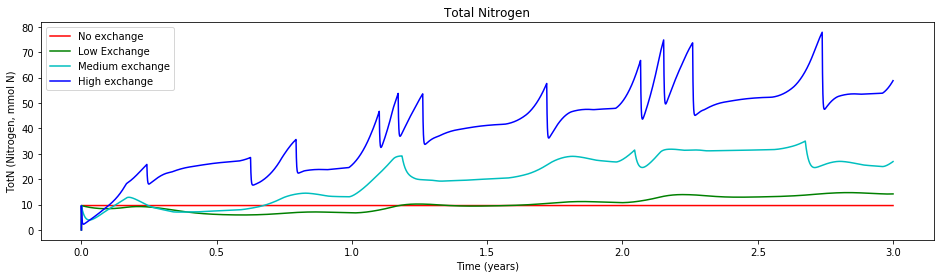

In [19]:
import matplotlib.pyplot as plt
fig, (ax) = plt.subplots(1,1,figsize=(16, 4))
ax.plot(Exp2_tank_WITHMussels['time']/365,Exp2_tank_WITHMussels['TotN'],'r-')
ax.plot(Exp3a_tank_WITHMussels_lowExchange['time']/365,Exp3a_tank_WITHMussels_lowExchange['TotN'],'g-')
ax.plot(Exp3b_tank_WITHMussels_mediumExchange['time']/365,Exp3b_tank_WITHMussels_mediumExchange['TotN'],'c-')
ax.plot(Exp3c_tank_WITHMussels_highExchange['time']/365,Exp3c_tank_WITHMussels_highExchange['TotN'],'b-')
ax.set_xlabel('Time (years)')
ax.set_ylabel('TotN (Nitrogen, mmol N)')
ax.set_title('Total Nitrogen')
ax.legend(['No exchange', 'Low Exchange', 'Medium exchange', 'High exchange', 'Outside concentration'])

<div class="Q"><br>

What happened with the Total Nitrogen of the systems, "TotN", as the you increase the exchange rate in the different runs in Experiment 3?

<br><br><div class="qhelp"></div></div>

------------

# Experiment 4: Embayment with low exchange and varying mussels

For the next couple of experiments we'll change the physical dimensions of the model:

```
par['X'] = 2000.# Basin length
par['Y'] = 100. # Basin width
par['Z'] = 10.  # Basin depth
```
With these physical dimensions the model should be seen as an embayment (instead of a tank), where the parameter `par['chi']` relates to the size of the embayment mouth and the corresponding exchange with the open ocean. 

In experiment 4, we'll make `par['chi']  = 0.001` therefore resembling an embayment with a very narrow mouth and little water exchange with the open ocean, like in the diagram below.

<img src="./Slide2.png" width="800px">


In this experiment we'll do several model runs, with the number of mussels increasing from 10000 all they way up to 100000000 mussels inside the embayment. 

<span class="important"></span> Note that instead of naming the outputs as `output`, we will name them with the number of mussels in the embayment. Therefore the output of the first model will be inside a dictionary called `10000` and the output of the last model run will be inside a dictionary called `100000000`. All 6 output dictionaries will be packed into a dictionary called `Exp4_multioutput`, which effectively will be a dictionary with 6 dictionaries inside it. At the end, for example, to access the phytoplankton array of the first model run you need to write `Exp4_multioutput['10000']['Phy']`

<div class="c2c"></div>

In [21]:
import model_NPZD2_SHELLE_openBoundary_withForcing as model
import forcing
import pickle

days, dt, par, InitCond = model.load_defaults() #Load defaults
forc = forcing.get(dt,days) # Load forcing

par['chi']  = 0.001 # exchange coefficient (with the "open ocean")
par['X'] = 2000.# Basin length
par['Y'] = 100. # Basin width
par['Z'] = 10.  # Basin depth
par['V'] = par['X'] * par['Y'] * par['Z']

Mussel_levels = [10000,100000,1000000,5000000,10000000,100000000]

Exp4_multioutput = {}
for level in Mussel_levels:
    InitCond['n_muss'] = float(level)
    Exp4_multioutput[str(level)] = model.run(days,dt,InitCond,par,forc)
    
pickle.dump( Exp4_multioutput, open( 'Exp4_multioutput.p', 'wb' ) )

print('Experiment is DONE! and saved in: Exp4_multioutput.p')

Oxygen Units were changed!
Oxygen Units were changed!
Model run: DONE!!!
Model run: DONE!!!
Model run: DONE!!!
Model run: DONE!!!
Model run: DONE!!!
Model run: DONE!!!
Experiment is DONE! and saved in: Exp4_multioutput.p


-------------

## Side note: What is "Pickle"?

In the code above you may have noted the lines `import pickle` and `pickle.dump( Exp4_multioutput, open( 'Exp4_multioutput.p', 'wb' ) )`

"Pickling" is action of saving a variable to a file. So that you may turn your computer off, and later load the file to continue your work. To load the contents of your file to a variable, do:

```
output = pickle.dump(open( 'Exp4_multioutput.p', 'rb' ) )
```

----------------

### plotting Experiment 4

I am including a file, <span class="file">plot_experiment.py</span>, with functions to easily make plots of the different runs stored in a "multioutput" variable like `Exp4_multioutput`. You can import and use <span class="file">plot_experiment.py</span> as a module. However, before I show how to use the `plot_experiment` module, we should do once a plot from scratch to see how `plot_experiment` does the plotting.

In earlier labs you have done graphs where you plot the output of several runs into one graph. If you remember, you can do this by adding one line of code for each additional line in your graph, like:

```
import matplotlib.pyplot as plt

fig, (ax) = plt.subplots(1,1)
ax.plot(x1,y1,'b-')
ax.plot(x2,y2,'g-')
ax.plot(x3,y4,'r-')
etc...
```

You can certainly still do your graph using the approach described above, however, in the code below we do something slightly fancier, we use a `for` loop to cycle over the dictionaries inside the `multioutput` dictionary. The code will work regardless of the number of runs stored in the `multioutput` variable (i.e. same code whether you have 6 runs or 20 runs).

In every cycle, the code draws a new line. Take a look at the code below, paying particular attention to the comments.

<div class="c2c"></div>

Printing...


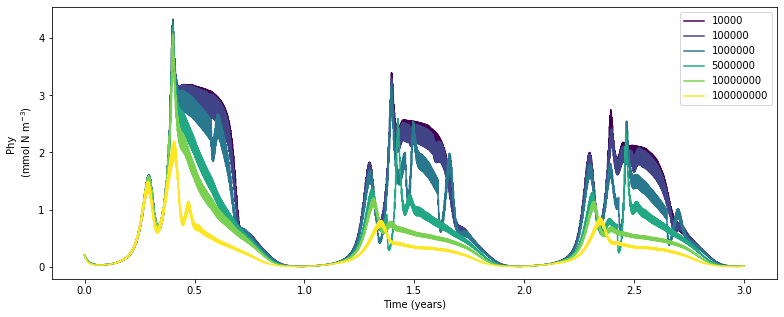

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# First we do (once) an empty graph and add an ylabel and xlabel
fig, (ax) = plt.subplots(1,1,figsize=(13,5))
ax.set_ylabel('Phy \n (mmol N m$^{-3}$)')
ax.set_xlabel('Time (years)')
# We also apply the "set_color_cycle" method to automatically assign color to the lines from a custom palette (in this case: viridis)
ax.set_prop_cycle('color',[plt.cm.viridis(i) for i in np.linspace(0, 1, len(Exp4_multioutput))])

# We create a variable called "levels" by using an "sorted" version of the "keys" of the multioutput dictionary.
levels = sorted([float(i) for i in Exp4_multioutput.keys()])

legendKeys = []  # makes an empty list
# Cycles over all levels inside the "levels" variable
for floatLevel in levels:
    level = str(int(floatLevel)) #Change each level from a float into a string
    legendKeys.append(level) # Appends the "string level" to legendKeys
    # Plots the "Phy" array of each "level" within the multioutput dictionary
    ax.plot(Exp4_multioutput[level]['time']/365,Exp4_multioutput[level]['Phy'],'-')

print('Printing...')
ax.legend(legendKeys) # Prints a legend
plt.show()

The code above can be a bit confusing, so I turn it into a simple-to-use module so you don't have to worry about the plotting details and can focus on interpreting the results.

In the code below, we import the `plot_experiment` module and we use it to create EXACTLY the same graph we created we the complicated code above. Simply use the `plot_one_variable` function with the `multioutput` dictionary in question as input argument and `var='Phy'` as a keyword argument specifying the name of the variable you want to plot (in this case `'Phy'`).

<div class="c2c"></div>

Printing...


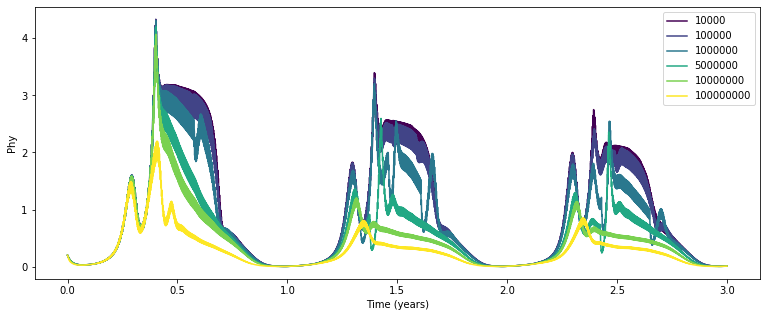

In [25]:
import plot_experiment as pexp

pexp.plot_one_variable(Exp4_multioutput,var='Phy')

...much simpler to use, isn't it?

<div class="Q"><br>

Taking a look at the graph above, what happens to the Phytoplankton concentration, "Phy", as you increase the amount of mussels in the embayment?


<br><br><div class="qhelp"></div></div>

Now plot Oxygen, by using the code below:

<div class="c2c"></div>

Printing...


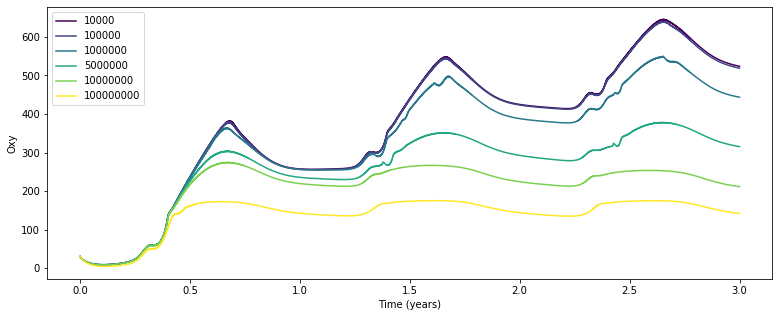

In [26]:
pexp.plot_one_variable(Exp4_multioutput,var='Oxy')

<div class="Q"><br>

Taking a look at the graph above, what happens to Oxygen concentration, "Oxy", as you increase the amount of mussels in the embayment?


<br><br><div class="qhelp"></div></div>

Now plot `TotN`, by using the code below:

<div class="c2c"></div>

Printing...


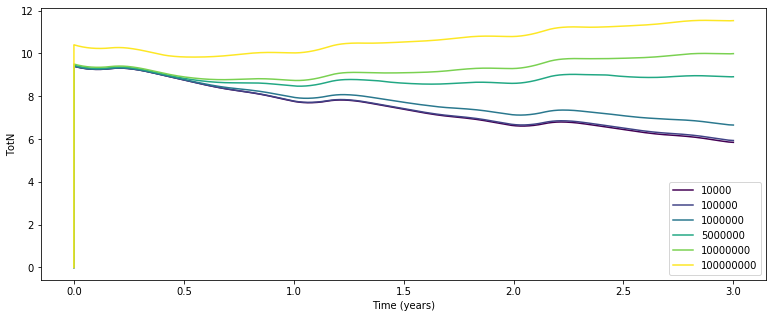

In [27]:
pexp.plot_one_variable(Exp4_multioutput,var='TotN')

Once you have an "open boundary" the Total Nitrogen in the system is likely **not** to be conserved. For testing purposes (i.e. to see if your model conserved mass), you need to set up a run without any exchange through the open boundary.

Note that the `plot_ecosystem` function lets you print all the ecosystem at once:

<div class="c2c"></div>

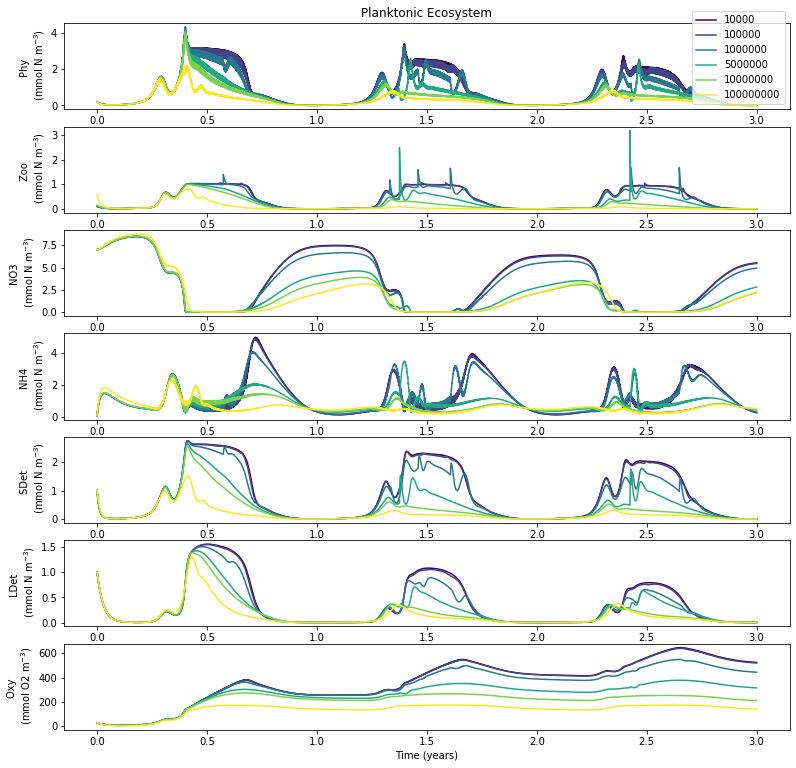

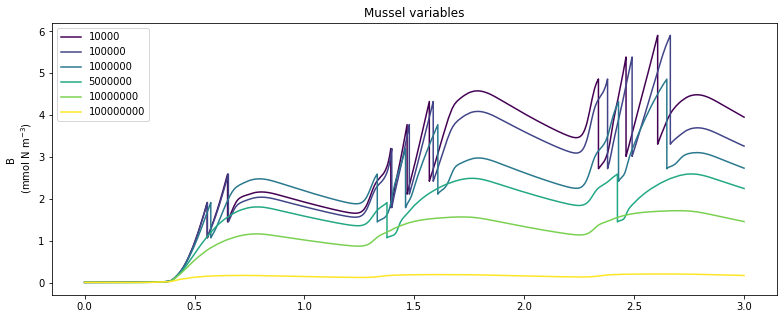

In [28]:
pexp.plot_ecosystem(Exp4_multioutput)

<div class="Q"><br>

Taking a look at the graph above, how many time the mussels spawned when there were <b>10000</b> mussels in the embayment (dark purple line)?


<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Taking a look at the graph above, how many time the mussels spawned when there were <b>100000000</b> mussels in the embayment (yellow line)?


<br><br><div class="qhelp"></div></div>

--------------

# Experiment 5: Embayment with HIGH exchange and varying mussels

Experiment 5 is the same as Experiment 4, but with a relatively high exchange rate with the open ocean (i.e. `par['chi']  = 0.3`), therefore the model resembles an embayment with a wide mouth, like in the diagram below.


<img src="./Slide3.png" width="800px">

Same as with Experiment 4, in this experiment we'll do 6 model runs, with the number of mussels increasing from 10000 all they way up to 100000000 mussels inside the embayment. 

<span class="important"></span> Same as before, the output dictionary of each of the 6 model runs will be packed into a dictionary called `Exp5_multioutput`.

<div class="c2c"></div>

In [29]:
import model_NPZD2_SHELLE_openBoundary_withForcing as model
import forcing
import pickle

days, dt, par, InitCond = model.load_defaults() #Load defaults
forc = forcing.get(dt,days) # Load forcing

par['chi']  = 0.3 # exchange coefficient (with the "open ocean")
par['X'] = 2000.# Basin length
par['Y'] = 100. # Basin width
par['Z'] = 10.  # Basin depth
par['V'] = par['X'] * par['Y'] * par['Z']

Mussel_levels = [10000,100000,1000000,5000000,10000000,100000000]

Exp5_multioutput = {}
for level in Mussel_levels:
    InitCond['n_muss'] = float(level)
    Exp5_multioutput[str(level)] = model.run(days,dt,InitCond,par,forc)
    
pickle.dump( Exp5_multioutput, open( 'Exp5_multioutput.p', 'wb' ) )

print('Experiment is DONE! and saved in: Exp5_multioutput.p')

Oxygen Units were changed!
Oxygen Units were changed!
Model run: DONE!!!
Model run: DONE!!!
Model run: DONE!!!
Model run: DONE!!!
Model run: DONE!!!
Model run: DONE!!!
Experiment is DONE! and saved in: Exp5_multioutput.p


Lets take a look at the whole ecosystem at once:

<div class="c2c"></div>

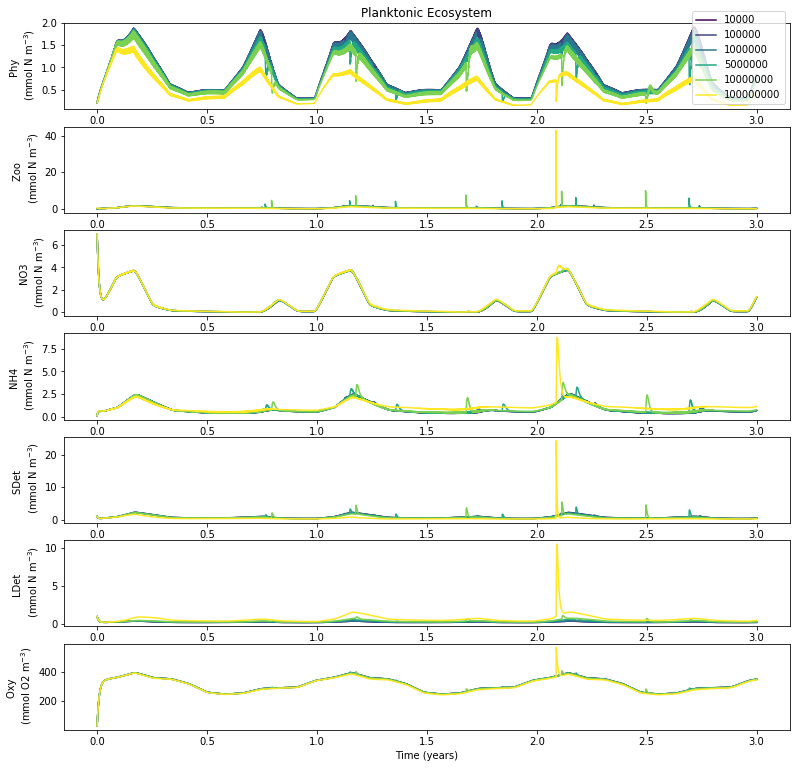

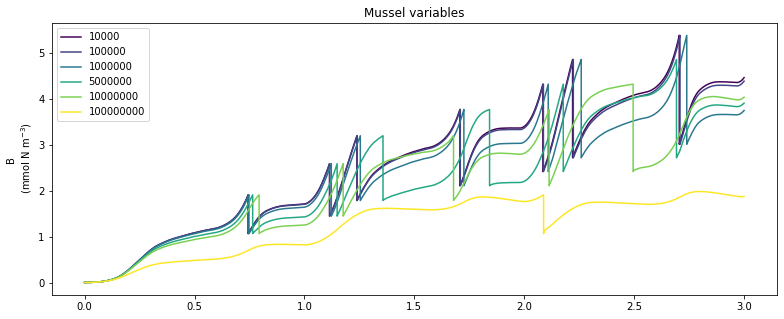

In [30]:
pexp.plot_ecosystem(Exp5_multioutput)

To better compare the results of Experiment 5 (i.e. high exchange) against the results of Experiment 4 (i.e. low exchange), do the following:

<div class="c2c"></div>

Printing...


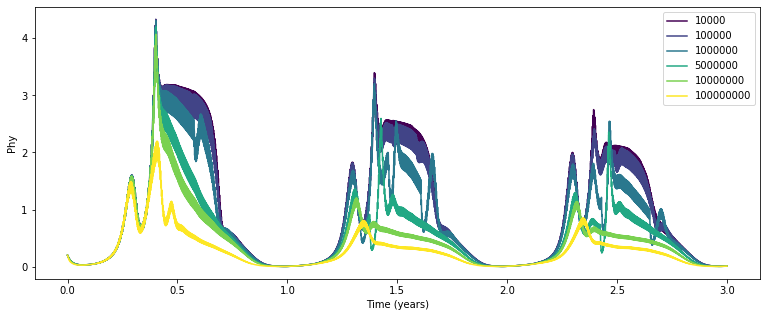

Printing...


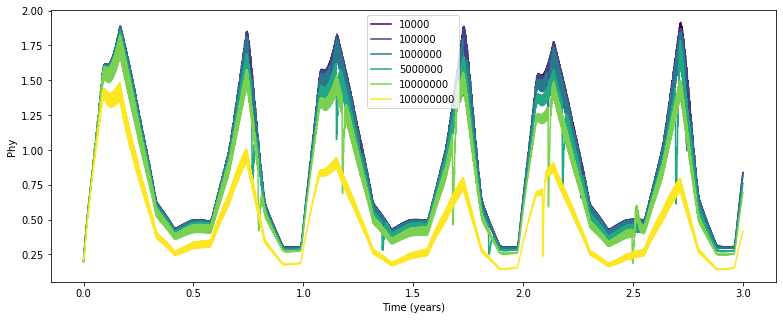

In [31]:
pexp.plot_one_variable(Exp4_multioutput,var='Phy')
pexp.plot_one_variable(Exp5_multioutput,var='Phy')

<div class="c2c"></div>

Printing...


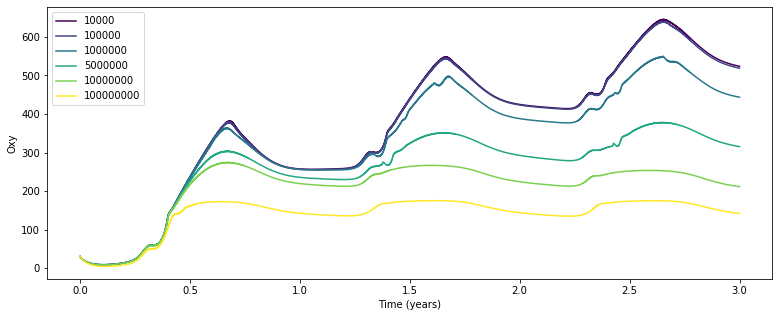

Printing...


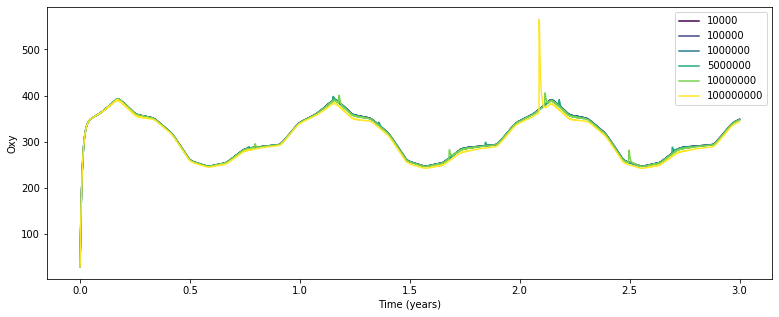

In [32]:
pexp.plot_one_variable(Exp4_multioutput,var='Oxy')
pexp.plot_one_variable(Exp5_multioutput,var='Oxy')

<div class="Q"><br>

Taking a look at the graph above (Exp5), what happens to Oxygen concentration, "Oxy", as you increase the amount of mussels in the embayment?


<br><br><div class="qhelp"></div></div>

<div class="c2c"></div>

Printing...


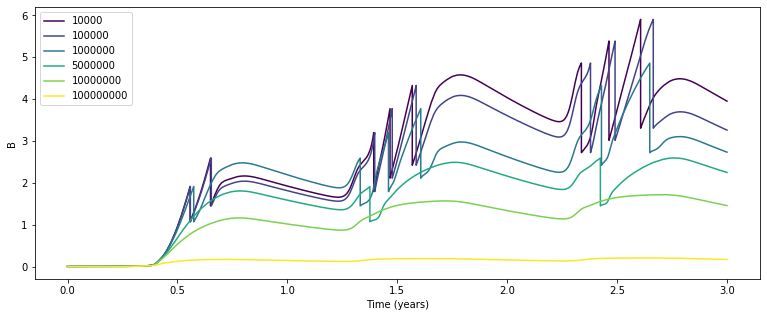

Printing...


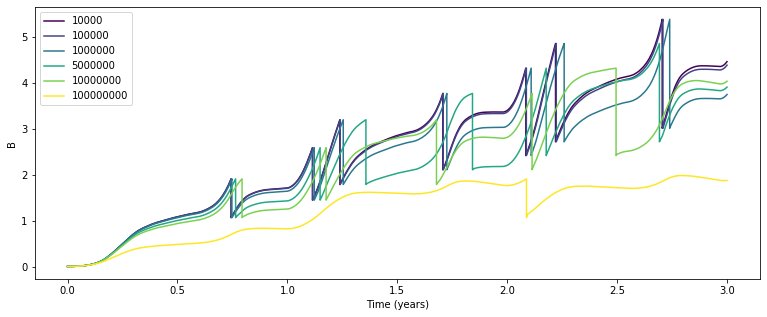

In [33]:
pexp.plot_one_variable(Exp4_multioutput,var='B')
pexp.plot_one_variable(Exp5_multioutput,var='B')

<div class="Q"><br>

Taking a look at the graph above (Exp5), how many time the mussels spawned when there were <b>10000</b> mussels in the embayment (dark purple line)?


<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Comparing Exp4 and Exp5, were there more spawning events in the run with <b>10000</b> mussels (dark purple line) in the run with low exchange (Exp4) or in the run with high exchange (Exp 5)?


<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Taking a look at the graph above (Exp5), how many time the mussels spawned when there were <b>100000000</b> mussels in the embayment (yellow line)?


<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Comparing Exp4 and Exp5, were there more spawning events in the run with <b>100000000</b> mussels (yellow line) in the run with low exchange (Exp4) or in the run with high exchange (Exp 5)?


<br><br><div class="qhelp"></div></div>

As you can see, it is hard to **intuitively** predict what is going to happen when varying a couple of variables, like water exchange and number of mussels.

<div class="c2c"></div>

Printing...


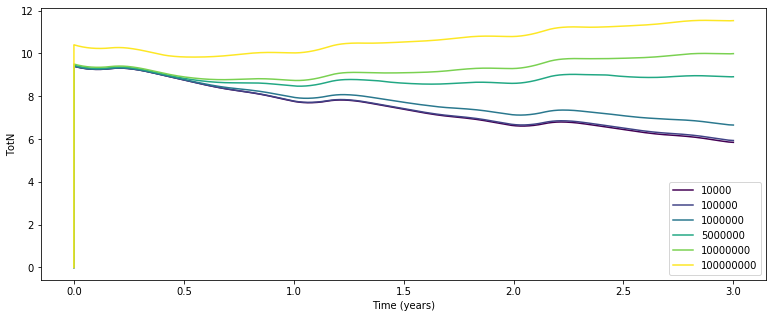

Printing...


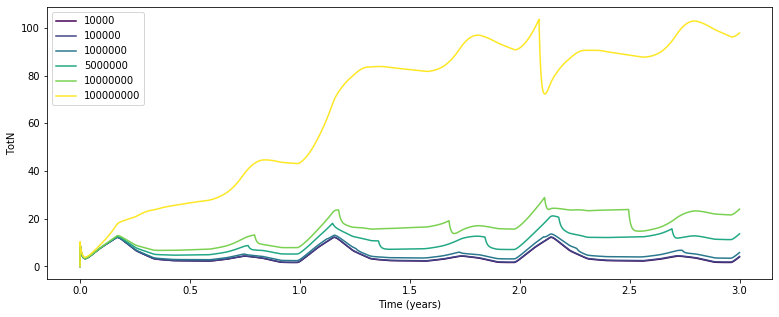

In [34]:
pexp.plot_one_variable(Exp4_multioutput,var='TotN')
pexp.plot_one_variable(Exp5_multioutput,var='TotN')

<div class="Q"><br>

Comparing Exp4 and Exp5, in which experiment there was a larger increase of the total nitrogen of the system?


<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Why?


<br><br><div class="qhelp"></div></div>

-------------------

# Experiment 6: Adding sewage, eutrophication and anoxia

In this experiment we will ad the NO3 to the embayment simulating the addition of organic matter, like sewage or fish food.

In <span class='file'>model_NPZD2_SHELLE_openBoundary_withForcing.py</span>, add `par['sewage'] = 0.0 # NO3 input to the embayment` to the `# Parameters` section...

Then add the following right BEFORE the `#SHEELE` section:

```
        # Sewage (NO3 inputs to the embayment)
        dNO3dt = dNO3dt + (par['sewage'] * par['V'] * dt)
```

You can see the final <span class='file'>model_NPZD2_SHELLE_openBoundary_withForcing.py</span> in <span class="checkpoint"><a href="https://raw.githubusercontent.com/Diego-Ibarra/aquaculture-modelling/master/Week7/model_NPZD2_SHELLE_openBoundary_withForcing.py" target="__blank">HERE</a></span> 


Lets run again the model with an embayment with low exchange, but this time we'll add 3 different amounts of organic loading to the bay:

<div class="c2c"></div>

In [36]:
import model_NPZD2_SHELLE_openBoundary_withForcing as model
from importlib import reload
reload(model)
import forcing
import pickle

days, dt, par, InitCond = model.load_defaults() #Load defaults
forc = forcing.get(dt,days) # Load forcing

par['chi']  = 0.001 # exchange coefficient (with the "open ocean")
par['X'] = 2000.# Basin length
par['Y'] = 100. # Basin width
par['Z'] = 10.  # Basin depth
par['V'] = par['X'] * par['Y'] * par['Z']

Exp6_multioutput = {}
par['sewage'] = 0.000000001
Exp6_multioutput['low'] = model.run(days,dt,InitCond,par,forc)

par['sewage'] = 0.00001
Exp6_multioutput['medium'] = model.run(days,dt,InitCond,par,forc)

par['sewage'] = 0.001
Exp6_multioutput['high'] = model.run(days,dt,InitCond,par,forc)

    
pickle.dump( Exp6_multioutput, open( 'Exp6_multioutput.p', 'wb' ) )

print('Experiment is DONE! and saved in: Exp6_multioutput.p')


Oxygen Units were changed!
Oxygen Units were changed!
Model run: DONE!!!
Model run: DONE!!!
Model run: DONE!!!
Experiment is DONE! and saved in: Exp6_multioutput.p


Lets see what happened to the total nitrogen in the system:

<div class="c2c"></div>

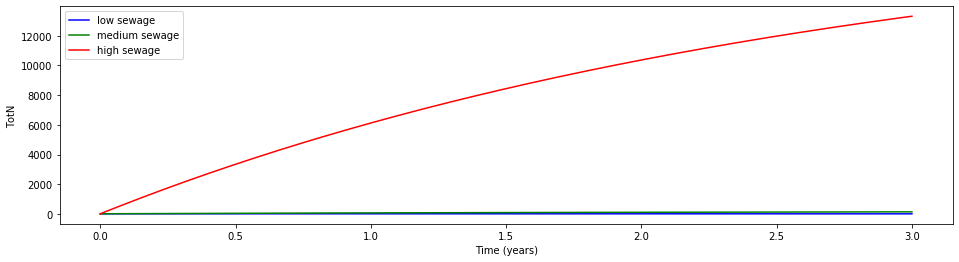

In [37]:
import matplotlib.pyplot as plt
fig, (ax) = plt.subplots(1,1,figsize=(16, 4))
var = 'TotN'
ax.plot(Exp6_multioutput['low']['time']/365,Exp6_multioutput['low'][var],'b-')
ax.plot(Exp6_multioutput['medium']['time']/365,Exp6_multioutput['medium'][var],'g-')
ax.plot(Exp6_multioutput['high']['time']/365,Exp6_multioutput['high'][var],'r-')
ax.set_xlabel('Time (years)')
ax.set_ylabel(var)
ax.legend(['low sewage', 'medium sewage', 'high sewage'])

<div class="Q"><br>

What happens to the total nitrogen of the system, "TotN", as we increase the amount of organic loading in the embayment?


<br><br><div class="qhelp"></div></div>

Let see what happened to the phytoplankton biomass (`Phy`):

<div class="c2c"></div>

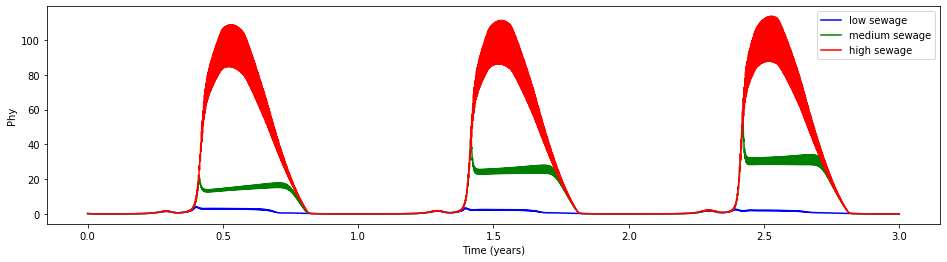

In [38]:
import matplotlib.pyplot as plt
fig, (ax) = plt.subplots(1,1,figsize=(16, 4))
var = 'Phy'
ax.plot(Exp6_multioutput['low']['time']/365,Exp6_multioutput['low'][var],'b-')
ax.plot(Exp6_multioutput['medium']['time']/365,Exp6_multioutput['medium'][var],'g-')
ax.plot(Exp6_multioutput['high']['time']/365,Exp6_multioutput['high'][var],'r-')
ax.set_xlabel('Time (years)')
ax.set_ylabel(var)
ax.legend(['low sewage', 'medium sewage', 'high sewage'])

<div class="Q"><br>

What happens to the phytoplankton biomass, "Phy", as we increase the amount of organic loading in the embayment?


<br><br><div class="qhelp"></div></div>

Lets look at the mussel biomass, `B`, and the amount of spawning events:

<div class="c2c"></div>

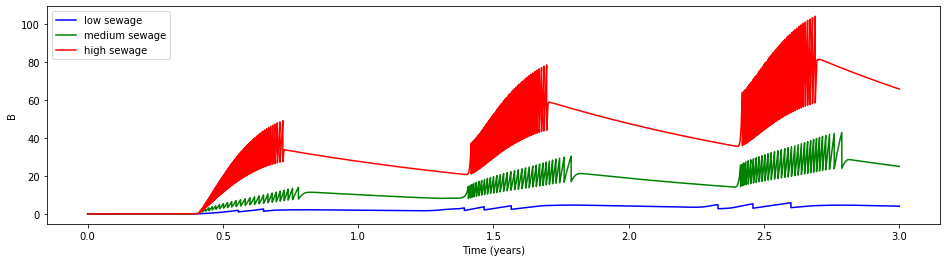

In [39]:
import matplotlib.pyplot as plt
fig, (ax) = plt.subplots(1,1,figsize=(16, 4))
var = 'B'
ax.plot(Exp6_multioutput['low']['time']/365,Exp6_multioutput['low'][var],'b-')
ax.plot(Exp6_multioutput['medium']['time']/365,Exp6_multioutput['medium'][var],'g-')
ax.plot(Exp6_multioutput['high']['time']/365,Exp6_multioutput['high'][var],'r-')
ax.set_xlabel('Time (years)')
ax.set_ylabel(var)
ax.legend(['low sewage', 'medium sewage', 'high sewage'])

<div class="Q"><br>

What happens to the mussel biomass, "B", and the number of spawning events, as we increase the amount of organic loading in the embayment?


<br><br><div class="qhelp"></div></div>

Finally, lets look at the oxygen concentration, `Oxy`, in the embayment:

<div class="c2c"></div>

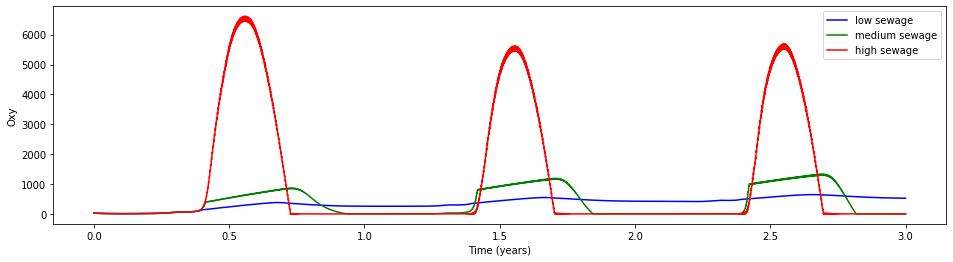

In [40]:
import matplotlib.pyplot as plt
fig, (ax) = plt.subplots(1,1,figsize=(16, 4))
var = 'Oxy'
ax.plot(Exp6_multioutput['low']['time']/365,Exp6_multioutput['low'][var],'b-')
ax.plot(Exp6_multioutput['medium']['time']/365,Exp6_multioutput['medium'][var],'g-')
ax.plot(Exp6_multioutput['high']['time']/365,Exp6_multioutput['high'][var],'r-')
ax.set_xlabel('Time (years)')
ax.set_ylabel(var)
ax.legend(['low sewage', 'medium sewage', 'high sewage'])

<div class="Q"><br>

What happens to the Oxygen concentration, "Oxy", as we increase the amount of organic loading in the embayment?


<br><br><div class="qhelp"></div></div>

_Please beware that this model was designed as a teaching tool and may not be adequate to represent realistic applications_.

# **This is the end of lab**

*******************
*******************

Code below is for formatting of this lab. Do not alter!

In [4]:
# Loads css file and applies it to lab HTML
from IPython.core.display import HTML
def css():
    style = open("../css/custom.css", "r").read()
    return HTML(style)
css()